In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets as ds

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 101

In [3]:
bc_data = ds.load_breast_cancer()
bc_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
df = pd.concat([pd.DataFrame(bc_data.data, columns=bc_data.feature_names), 
                pd.DataFrame(bc_data.target, columns=["Target"])], 
               axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X = bc_data.data
y = bc_data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X_train = sc.fit_transform(X_train)

In [11]:
X_test = sc.transform(X_test)

# Classification Case Study - Loan Prediction

In [12]:
train_df = pd.read_csv('LoanPredictionTrain.csv')
test_df = pd.read_csv('LoanPredictionTest.csv')

In [13]:
train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_360.0,Loan_Amount_Term_Other,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_status
0,0.116326,-0.993900,-0.228528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,N
1,-0.435433,-0.993900,-2.188582,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Y
2,-0.704140,-0.049443,-0.767543,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,Y
3,-0.306321,-0.993900,-0.743042,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,N
4,-0.434881,1.907659,1.339516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,N


In [15]:
train_df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Loan_Amount_Term_360.0     0
Loan_Amount_Term_Other     0
Credit_History_1.0         0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_status                0
dtype: int64

In [16]:
X_train = train_df.drop(['Loan_status'],axis=1)
y_train = train_df['Loan_status']

In [17]:
X_test = test_df.drop(['Loan_status'],axis=1)
y_test = test_df['Loan_status']

#### Categorical Encoding - Target (Label) Variable 

In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
le.fit(y_train)

LabelEncoder()

In [21]:
le.classes_

array(['N', 'Y'], dtype=object)

In [22]:
y_train = le.transform(y_train)

In [23]:
y_train

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [24]:
y_test = le.transform(y_test)
y_test

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [26]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [27]:
len(y_test)

132

In [28]:
lr_model.predict_proba(X_test)

array([[0.16794736, 0.83205264],
       [0.08712706, 0.91287294],
       [0.29501346, 0.70498654],
       [0.90315843, 0.09684157],
       [0.17597558, 0.82402442],
       [0.26945818, 0.73054182],
       [0.84120753, 0.15879247],
       [0.26164899, 0.73835101],
       [0.78017329, 0.21982671],
       [0.0724868 , 0.9275132 ],
       [0.11602381, 0.88397619],
       [0.93641187, 0.06358813],
       [0.16387663, 0.83612337],
       [0.92130542, 0.07869458],
       [0.10381084, 0.89618916],
       [0.1670109 , 0.8329891 ],
       [0.31197431, 0.68802569],
       [0.13309973, 0.86690027],
       [0.86527957, 0.13472043],
       [0.30717216, 0.69282784],
       [0.35633726, 0.64366274],
       [0.21177813, 0.78822187],
       [0.16432205, 0.83567795],
       [0.1315962 , 0.8684038 ],
       [0.08125667, 0.91874333],
       [0.93294941, 0.06705059],
       [0.39701873, 0.60298127],
       [0.21519424, 0.78480576],
       [0.85914922, 0.14085078],
       [0.89144961, 0.10855039],
       [0.

In [29]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [31]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[21, 21],
       [ 1, 89]])

In [32]:
ac = accuracy_score(y_test,y_pred)
ac

0.8333333333333334

In [33]:
precision = precision_score(y_test,y_pred)
precision

0.8090909090909091

In [34]:
recall = recall_score(y_test,y_pred)
recall

0.9888888888888889

In [35]:
f1 = f1_score(y_test,y_pred)
f1

0.89

#### Assess a model's performance -->>

- 1. Accuracy
- 2. f1
- 3. Precision / Recall

## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() # max_depth=5
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
y_pred_dt = dt_model.predict(X_test)

In [60]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[22, 20],
       [12, 78]])

In [61]:
ac = accuracy_score(y_test,y_pred_dt)
ac

0.7575757575757576

In [62]:
dt_model.feature_importances_

array([0.21054727, 0.11970973, 0.19191225, 0.01447276, 0.0115491 ,
       0.04733846, 0.        , 0.00791066, 0.        , 0.00895206,
       0.00333846, 0.02596132, 0.32448986, 0.01254313, 0.02127495])

#### Feauture Importances

In [63]:
feat_imps = pd.DataFrame({'Features':X_train.columns,
                          'Importances':dt_model.feature_importances_})
feat_imps.sort_values(by=['Importances'],ascending=False,inplace=True)
feat_imps

,Features,Importances
12,Credit_History_1.0,0.324490
0,ApplicantIncome,0.210547
2,LoanAmount,0.191912
1,CoapplicantIncome,0.119710
5,Dependents_1,0.047338
11,Loan_Amount_Term_Other,0.025961
14,Property_Area_Urban,0.021275
3,Gender_Male,0.014473
13,Property_Area_Semiurban,0.012543
4,Married_Yes,0.011549


In [64]:
#!pip install pydotplus

In [65]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

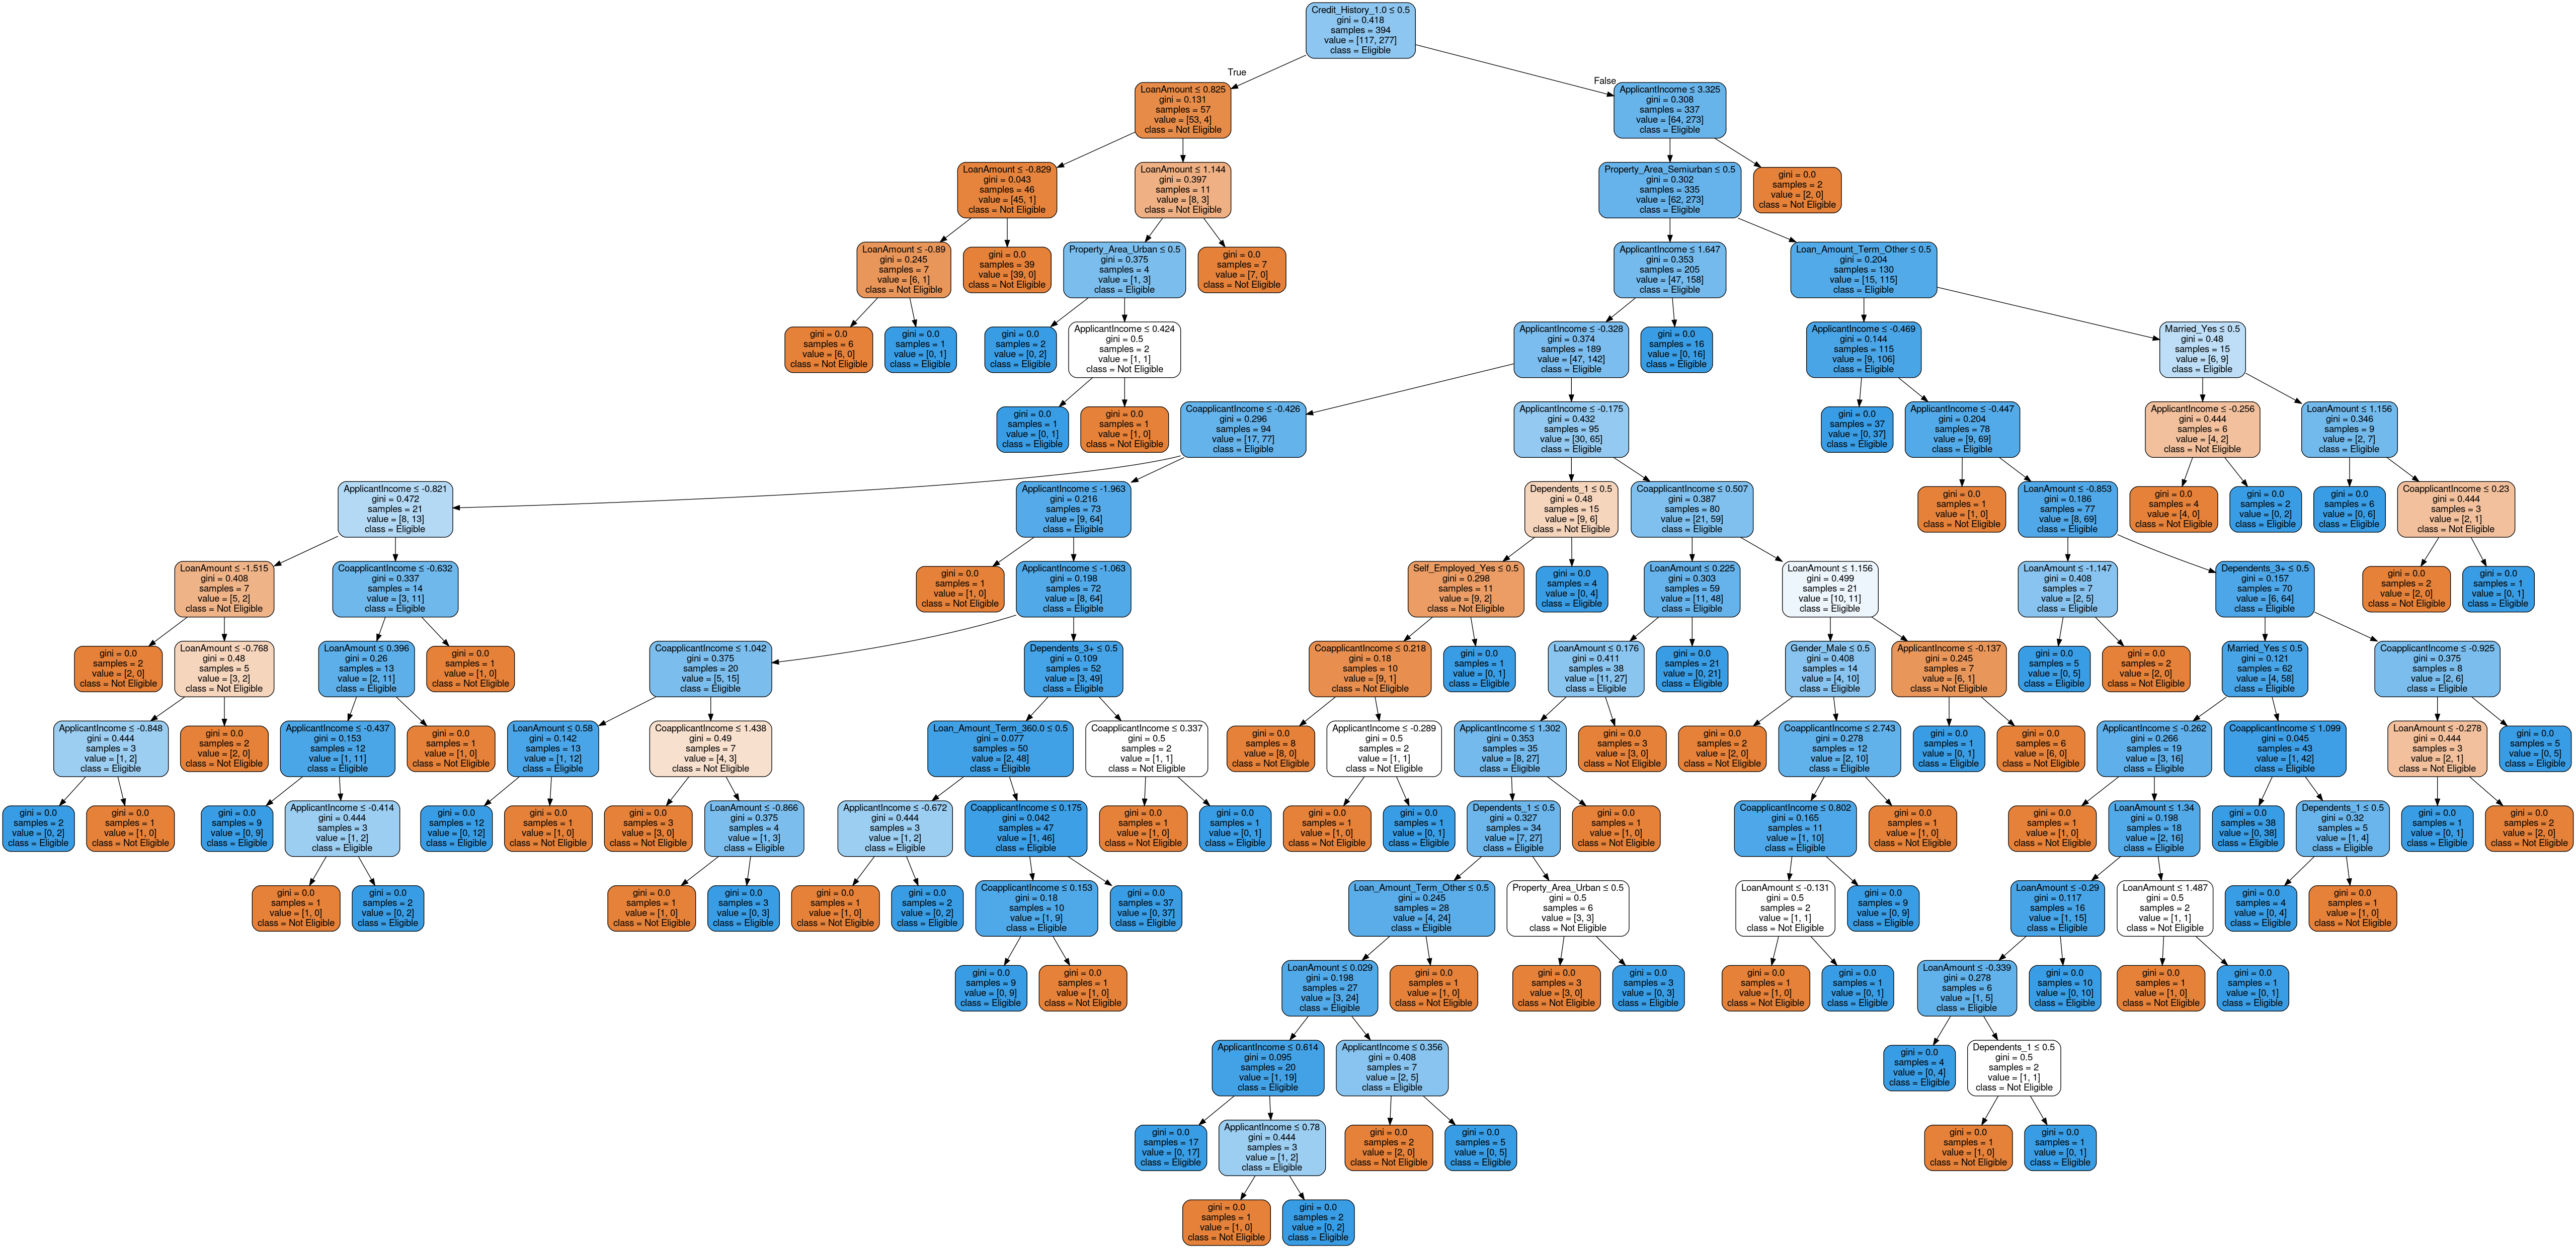

In [66]:
dot_data = StringIO()
tree.export_graphviz(dt_model,
                     out_file=dot_data,
                     class_names=["Not Eligible","Eligible"],
                     feature_names=X_train.columns,
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Gini Impurity

The Gini Impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of samples in the node.
!["Gini"](Gini.png)

At each node, the decision tree searches through the features for the value to split on that results in the greatest reduction in Gini Impurity. (An alternative for splitting nodes is using the <b>Information Gain</b>, a related concept).<br>
It then repeats this splitting process in a <b>greedy</b>, recursive procedure until it reaches a maximum depth, or each node contains only samples from one class. The weighted total Gini Impurity at each level of tree must decrease.<br>

The Gini Impurity of each node is weighted by the fraction of points from the parent node in that node.<br>

Eventually, the weighted total <b>Gini Impurity of the last level goes to 0</b> meaning each node is completely pure and there is no chance that a point randomly selected from that node would be misclassified. While this may seem like a positive, it means that the model may potentially be <b>overfitting</b> because the nodes are constructed only using training data.

### Overfitting

The objective of a machine learning model is to generalize well to <b>new data it has never seen before</b>.<br>
<b>Overfitting</b> occurs when we have a very flexible model (the model has a high capacity) which essentially memorizes the training data by fitting it closely. The problem is that the model learns not only the actual relationships in the training data, but also any noise that is present. A flexible model is said to have <b>high variance</b> because the learned parameters (such as the structure of the decision tree) will vary considerably with the training data.<br>
On the other hand, an inflexible model is said to have <b>high bias</b> because it makes assumptions about the training data (it’s biased towards pre-conceived ideas of the data.)<br> 
For example, a linear classifier makes the assumption that the data is linear and does not have the flexibility to fit non-linear relationships.<br> 
An inflexible model may not have the capacity to fit even the training data and in both cases — high variance and high bias — the model is not able to generalize well to new data.

The reason the decision tree is prone to overfitting when we don’t limit the maximum depth is because it has unlimited flexibility, meaning that it can keep growing until it has exactly one leaf node for every single observation, perfectly classifying all of them.<br> 
If you go back to the image of the decision tree and limit the maximum depth to 5, the classifications are no longer 100% correct.<br>
We have reduced the variance of the decision tree but at the cost of increasing the bias.<br>

### Pruning Of Decision Tree

<b> Pruning </b> is a technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. <br> 
Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of <b>overfitting</b>.

As an alternative to limiting the depth of the tree, which reduces variance (good) and increases bias (bad), we can combine many decision trees into a single ensemble model.

## k-Nearest-Neighbour - kNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier()

In [54]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
y_pred_knn = knn_model.predict(X_test)

In [56]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[12, 30],
       [ 9, 81]])

In [57]:
ac = accuracy_score(y_test,y_pred_knn)
ac

0.7045454545454546

## Ensemble Techniques

### Bootstrap Method
The bootstrap is a powerful statistical method for estimating a quantity from a data sample.<br> 
This is easiest to understand if the quantity is a descriptive statistic such as a mean or a standard deviation.<br><br>

Let’s assume we have a sample of 100 values (x) and we’d like to get an estimate of the mean of the sample.
<br>
We can calculate the mean directly from the sample as:
<br>
mean(x) = 1/100 * sum(x)
<br>
We know that our sample is small and that our mean has error in it. We can improve the estimate of our mean using the bootstrap procedure:
<br>
Create many (e.g. 1000) random sub-samples of our dataset with replacement (meaning we can select the same value multiple times).
- Calculate the mean of each sub-sample.
- Calculate the average of all of our collected means and use that as our estimated mean for the data.

### Bootstrap Aggregation (Bagging)
<b>Bootstrap Aggregation</b> (or Bagging for short), is a simple and very powerful ensemble method.
<br>
An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.
<br>
Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees (CART).
<br>
Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.
<br>
Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.
<br>
Let’s assume we have a sample dataset of 1000 instances (x) and we are using the CART algorithm. Bagging of the CART algorithm would work as follows.
- Create many (e.g. 100) random sub-samples of our dataset with replacement.
- Train a CART model on each sample.
- Given a new dataset, calculate the average prediction from each model.

For example, if we had 5 bagged decision trees that made the following class predictions for a in input sample: blue, blue, red, blue and red, we would take the most frequent class and predict blue.
<br>
When bagging with decision trees, we are less concerned about individual trees overfitting the training data. For this reason and for efficiency, the individual decision trees are grown deep (e.g. few training samples at each leaf-node of the tree) and the trees are not pruned. These trees will have both high variance and low bias. These are important characterize of sub-models when combining predictions using bagging.
<br>
The only parameters when bagging decision trees is the number of samples and hence the number of trees to include. This can be chosen by increasing the number of trees on run after run until the accuracy begins to stop showing improvement (e.g. on a cross validation test harness). Very large numbers of models may take a long time to prepare, but will not overfit the training data.
<br>
Just like the decision trees themselves, Bagging can be used for classification and regression problems.

In [67]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(base_estimator=dt_model, n_estimators=100)
model_bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [68]:
y_pred_bg = model_bagging.predict(X_test)

In [69]:
confusion_matrix(y_test,y_pred_bg)

array([[21, 21],
       [ 6, 84]])

## Random Forest

<b>Random Forests</b> are an improvement over bagged decision trees.
<br>
A problem with decision trees like CART is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions.
<br>
Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated.
<br>
Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.
<br>
It is a simple tweak. In CART, when selecting a split point, the learning algorithm is allowed to look through all variables and all variable values in order to select the most optimal split-point. The random forest algorithm changes this procedure so that the learning algorithm is limited to a random sample of features of which to search.
<br>
The number of features that can be searched at each split point (m) must be specified as a parameter to the algorithm. You can try different values and tune it using cross validation.
<br>

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred_rf = model_rf.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred_rf)

array([[19, 23],
       [ 5, 85]])

## Boosting

In [77]:
d_stump = DecisionTreeClassifier(max_depth=1)

In [78]:
d_stump.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

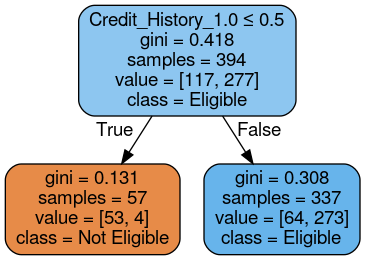

In [79]:
dot_data = StringIO()
tree.export_graphviz(d_stump,
                     out_file=dot_data,
                     class_names=["Not Eligible","Eligible"],
                     feature_names=X_train.columns,
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
adb_model = AdaBoostClassifier(#base_estimator=dt_model,
                               n_estimators=100)

In [103]:
adb_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [104]:
y_pred_adb = adb_model.predict(X_test)

In [105]:
confusion_matrix(y_test,y_pred_adb)

array([[22, 20],
       [ 6, 84]])

## Model Evaluation

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
def evaluate_models(models):
    for model in models:
        print("Evaluation for {}".format(type(model).__name__))
        print("----"*20)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        print("\nConfusion Matrix:\n",cm)
        ac = accuracy_score(y_test,y_pred)
        print("\nAccuracy:\n",ac)
        print("\nClassification Report:\n")
        print(classification_report(y_test,y_pred))

In [109]:
models = [lr_model,dt_model,knn_model,model_bagging,model_rf,adb_model]

In [110]:
evaluate_models(models)

Evaluation for LogisticRegression
--------------------------------------------------------------------------------

Confusion Matrix:
 [[21 21]
 [ 1 89]]

Accuracy:
 0.8333333333333334

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.50      0.66        42
           1       0.81      0.99      0.89        90

    accuracy                           0.83       132
   macro avg       0.88      0.74      0.77       132
weighted avg       0.86      0.83      0.82       132

Evaluation for DecisionTreeClassifier
--------------------------------------------------------------------------------

Confusion Matrix:
 [[22 20]
 [12 78]]

Accuracy:
 0.7575757575757576

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        42
           1       0.80      0.87      0.83        90

    accuracy                           0.76       132
   macro avg       0.72      0.

## Cross Validation

In [111]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [112]:
def cross_validate_models(models, splits):
    kf = KFold(n_splits=splits,shuffle=True)
    for model in models:
        scores = cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=kf,
                                 n_jobs=12,
                                 scoring="accuracy")
        print("\n\nCross-Validation for {}:\n".format(type(model).__name__))
        print("Mean score: ", np.mean(scores))
        print("Variance of score: ", np.std(scores)**2)
        fig = plt.figure(figsize = (10,5))
        ax = fig.add_subplot(111)
        ax = sns.distplot(scores)
        ax.set_xlabel("Cross-Validated Accuracy scores")
        ax.set_ylabel("Frequency")
        ax.set_title('Frequency Distribution of Cross-Validated Accuracy scores for {}'.format(type(model).__name__), fontsize = 15)



Cross-Validation for LogisticRegression:

Mean score:  0.8224999999999999
Variance of score:  0.015553698979591836


Cross-Validation for DecisionTreeClassifier:

Mean score:  0.7485714285714287
Variance of score:  0.020112755102040816


Cross-Validation for KNeighborsClassifier:

Mean score:  0.7385714285714284
Variance of score:  0.01767551020408163


Cross-Validation for BaggingClassifier:

Mean score:  0.8014285714285714
Variance of score:  0.020990306122448975


Cross-Validation for RandomForestClassifier:

Mean score:  0.8146428571428571
Variance of score:  0.028735841836734693


Cross-Validation for AdaBoostClassifier:

Mean score:  0.7925
Variance of score:  0.018812372448979594


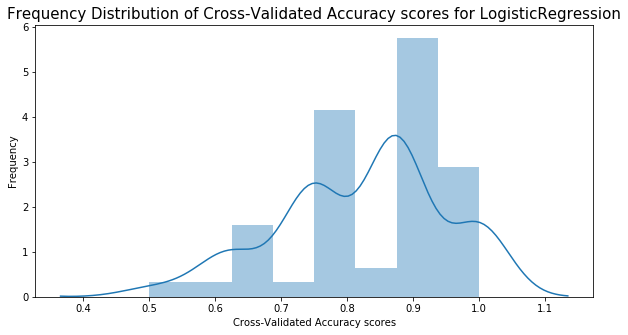

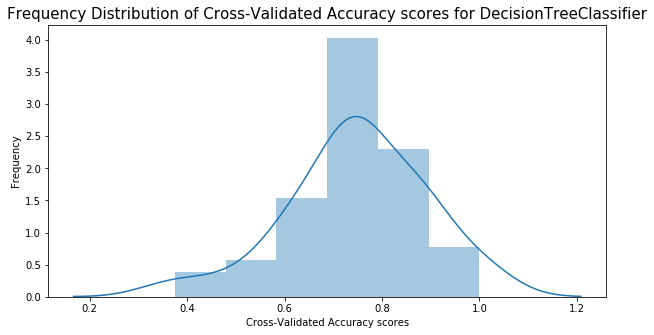

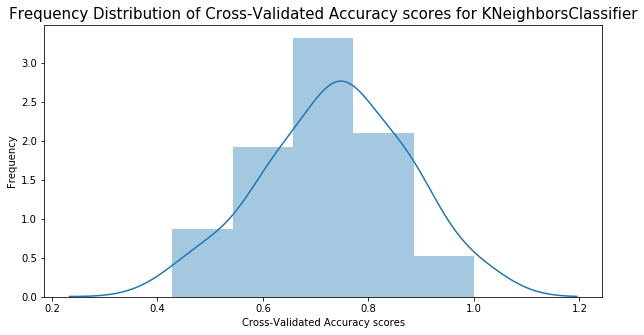

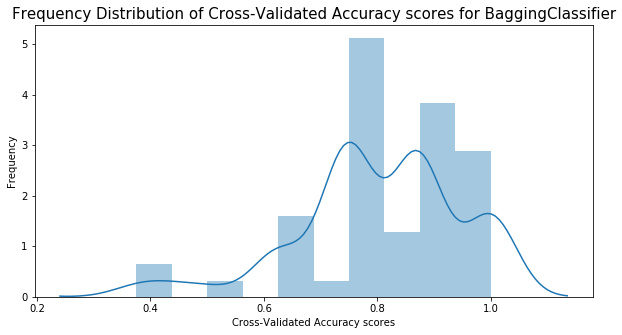

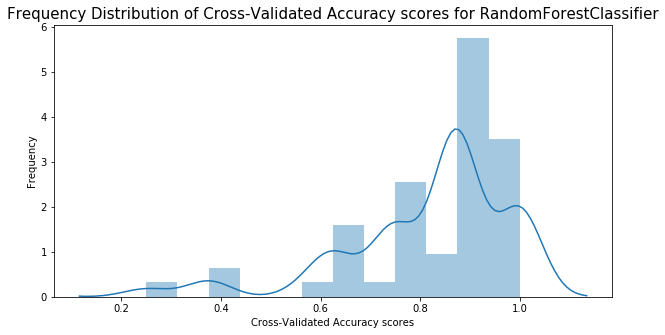

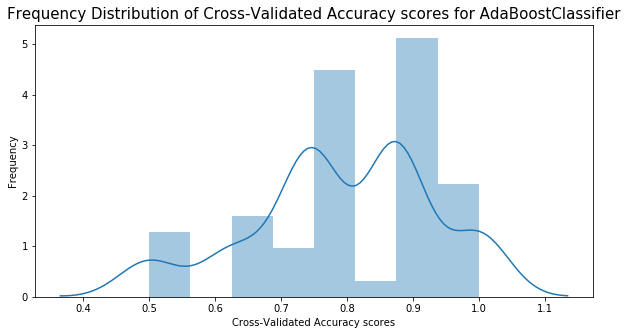

In [113]:
cross_validate_models(models,50)

## Hyper parameter Tuning

In [69]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [115]:
lr_params = {"penalty" : ["l1", "l2", "elasticnet"],
             "C" : np.logspace(0, 4, 10)}

In [116]:
dt_params = {"criterion":["gini","entropy"],
             "max_depth":[3,4,5,6,7,8],
             "max_features":["auto", "log2"]}

In [117]:
knn_params = {"n_neighbors" : [5,6,7,8],
              "weights" : ["uniform","distance"],
              "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}

In [136]:
bg_params = {"n_estimators": [100,150,200,250,300]}

In [144]:
rf_params = {"n_estimators": [100,150,200,250,300],
             "criterion":["gini","entropy"],
             "max_features":["auto", "log2"],
             "class_weight": ["balanced", "balanced_subsample"]}

In [165]:
adb_params = {"n_estimators": [100,150,200,250,300],
              "learning_rate":np.linspace(0.001, 1, 10)}

In [166]:
params = [lr_params,dt_params,knn_params,bg_params,rf_params,adb_params]

In [147]:
tuned_models = []

In [148]:
import time

In [149]:
def hyper_param_tuning(models,params,splits,scorer):
    kf = KFold(n_splits=splits,shuffle=True)
    for i in range(len(models)):
        gsearch = GridSearchCV(estimator=models[i],
                               param_grid=params[i],
                               scoring=scorer,
                               n_jobs=12,
                               cv=kf)
        start = time.time()
        gsearch.fit(X_train,y_train)
        end = time.time()
        
        print("Grid Search Results for {}:\n".format(type(models[i]).__name__))
        print("Time taken for tuning (in secs): \n", end-start)
        print("Best parameters: \n",gsearch.best_params_)
        print("Best score: \n",gsearch.best_score_)
        tuned_models.append(gsearch.best_estimator_)
        print("\n\n")

In [151]:
hyper_param_tuning(models,params,50,"accuracy")

Grid Search Results for LogisticRegression:

Time taken for tuning (in secs): 
 2.6321446895599365
Best parameters: 
 {'C': 1.0, 'penalty': 'l2'}
Best score: 
 0.8257142857142857



Grid Search Results for DecisionTreeClassifier:

Time taken for tuning (in secs): 
 0.8596582412719727
Best parameters: 
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Best score: 
 0.7910714285714284



Grid Search Results for KNeighborsClassifier:

Time taken for tuning (in secs): 
 1.1167080402374268
Best parameters: 
 {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Best score: 
 0.7499999999999999



Grid Search Results for BaggingClassifier:

Time taken for tuning (in secs): 
 15.63262677192688
Best parameters: 
 {'n_estimators': 150}
Best score: 
 0.8149999999999998



Grid Search Results for RandomForestClassifier:

Time taken for tuning (in secs): 
 111.96907496452332
Best parameters: 
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_est

In [162]:
tuned_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                      weights='distance'),
 BaggingClassifier(base_estimator=Decisi

In [163]:
def check_Precision(models):
    for model in models:
        print("\n\nConfusion Matrix for Tuned {}:\n".format(type(model).__name__))
        print(confusion_matrix(y_test,model.predict(X_test)))
        print("\nPrecision for Tuned {}:\n".format(type(model).__name__))
        print(precision_score(y_test,model.predict(X_test)))

In [164]:
check_Precision(tuned_models)



Confusion Matrix for Tuned LogisticRegression:

[[21 21]
 [ 1 89]]

Precision for Tuned LogisticRegression:

0.8090909090909091


Confusion Matrix for Tuned DecisionTreeClassifier:

[[16 26]
 [ 5 85]]

Precision for Tuned DecisionTreeClassifier:

0.7657657657657657


Confusion Matrix for Tuned KNeighborsClassifier:

[[15 27]
 [ 5 85]]

Precision for Tuned KNeighborsClassifier:

0.7589285714285714


Confusion Matrix for Tuned BaggingClassifier:

[[21 21]
 [ 6 84]]

Precision for Tuned BaggingClassifier:

0.8


Confusion Matrix for Tuned RandomForestClassifier:

[[20 22]
 [ 6 84]]

Precision for Tuned RandomForestClassifier:

0.7924528301886793


Confusion Matrix for Tuned AdaBoostClassifier:

[[19 23]
 [ 1 89]]

Precision for Tuned AdaBoostClassifier:

0.7946428571428571


## Model Tuning with Metrics

In [155]:
from sklearn.metrics import make_scorer, f1_score

In [156]:
def calc_precision(y_test,y_pred):
    return precision_score(y_test,y_pred)

In [170]:
def calc_f1(y_test,y_pred):
    return f1_score(y_test,y_pred)

In [157]:
precision_scorer = make_scorer(calc_precision, greater_is_better=True) # For REGRESSION ==> greater_is_better=False

In [171]:
f1_scorer = make_scorer(calc_f1, greater_is_better=True) # For REGRESSION ==> greater_is_better=False

In [172]:
hyper_param_tuning(models,params,50,f1_scorer)

Grid Search Results for LogisticRegression:

Time taken for tuning (in secs): 
 2.931396484375
Best parameters: 
 {'C': 1.0, 'penalty': 'l2'}
Best score: 
 0.8810839160839161



Grid Search Results for DecisionTreeClassifier:

Time taken for tuning (in secs): 
 1.0546212196350098
Best parameters: 
 {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Best score: 
 0.8507684537684537



Grid Search Results for KNeighborsClassifier:

Time taken for tuning (in secs): 
 1.296926736831665
Best parameters: 
 {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Best score: 
 0.8374314574314574



Grid Search Results for BaggingClassifier:

Time taken for tuning (in secs): 
 15.00159239768982
Best parameters: 
 {'n_estimators': 250}
Best score: 
 0.873049617049617



Grid Search Results for RandomForestClassifier:

Time taken for tuning (in secs): 
 114.87353444099426
Best parameters: 
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimator

In [167]:
hyper_param_tuning(models,params,50,precision_scorer)

Grid Search Results for LogisticRegression:

Time taken for tuning (in secs): 
 1.3463165760040283
Best parameters: 
 {'C': 1.0, 'penalty': 'l2'}
Best score: 
 0.8151190476190476



Grid Search Results for DecisionTreeClassifier:

Time taken for tuning (in secs): 
 0.9699890613555908
Best parameters: 
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}
Best score: 
 0.8021190476190475



Grid Search Results for KNeighborsClassifier:

Time taken for tuning (in secs): 
 1.2580029964447021
Best parameters: 
 {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
Best score: 
 0.76



Grid Search Results for BaggingClassifier:

Time taken for tuning (in secs): 
 14.428868293762207
Best parameters: 
 {'n_estimators': 100}
Best score: 
 0.8203333333333334



Grid Search Results for RandomForestClassifier:

Time taken for tuning (in secs): 
 114.54550552368164
Best parameters: 
 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators

In [173]:
tuned_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=5, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                      weights='distance'),
 BaggingClassifier(base_estimator=Decisi

In [176]:
check_Precision(tuned_models)



Confusion Matrix for Tuned LogisticRegression:

[[21 21]
 [ 1 89]]

Precision for Tuned LogisticRegression:

0.8090909090909091


Confusion Matrix for Tuned DecisionTreeClassifier:

[[16 26]
 [ 5 85]]

Precision for Tuned DecisionTreeClassifier:

0.7657657657657657


Confusion Matrix for Tuned KNeighborsClassifier:

[[15 27]
 [ 5 85]]

Precision for Tuned KNeighborsClassifier:

0.7589285714285714


Confusion Matrix for Tuned BaggingClassifier:

[[21 21]
 [ 6 84]]

Precision for Tuned BaggingClassifier:

0.8


Confusion Matrix for Tuned RandomForestClassifier:

[[20 22]
 [ 6 84]]

Precision for Tuned RandomForestClassifier:

0.7924528301886793


Confusion Matrix for Tuned AdaBoostClassifier:

[[19 23]
 [ 1 89]]

Precision for Tuned AdaBoostClassifier:

0.7946428571428571


Confusion Matrix for Tuned LogisticRegression:

[[21 21]
 [ 1 89]]

Precision for Tuned LogisticRegression:

0.8090909090909091


Confusion Matrix for Tuned DecisionTreeClassifier:

[[28 14]
 [19 71]]

Precision for

In [177]:
evaluate_models(tuned_models)

Evaluation for LogisticRegression
--------------------------------------------------------------------------------

Confusion Matrix:
 [[21 21]
 [ 1 89]]

Accuracy:
 0.8333333333333334

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.50      0.66        42
           1       0.81      0.99      0.89        90

    accuracy                           0.83       132
   macro avg       0.88      0.74      0.77       132
weighted avg       0.86      0.83      0.82       132

Evaluation for DecisionTreeClassifier
--------------------------------------------------------------------------------

Confusion Matrix:
 [[16 26]
 [ 5 85]]

Accuracy:
 0.7651515151515151

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.38      0.51        42
           1       0.77      0.94      0.85        90

    accuracy                           0.77       132
   macro avg       0.76      0.

In [180]:
tuned_models[-1]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=100, random_state=None)

In [181]:
import pickle

In [182]:
with open("ADB_Tuned.pkl", 'wb') as file:
    pickle.dump(tuned_models[-1], file)

In [184]:
with open("ADB_Tuned.pkl", 'rb') as file:
    saved_model = pickle.load(file)

In [185]:
saved_model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])